In [2]:
#import all libary
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# chake the shape of dataset
data.shape

(9240, 37)

In [5]:
# describe the dataset
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# total info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# check the duplicates for Prospect ID
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
# check the duplicates for Lead Number
sum(data.duplicated(subset = 'Lead Number')) == 0

True

In [9]:
# Calculating the percentage of na/null values in the dataset
round(100*data.isna().sum()/len(data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Dropping columns with more than 40% null values
cols=data.columns
for i in cols:
    if((100*(data[i].isnull().sum()/len(data))) >= 40):
        data.drop(i, 1, inplace = True)

In [11]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [12]:
# check the null value
round(100*data.isna().sum()/len(data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
#checking value counts of Country column
data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [14]:
# Replacing null values in Country column with mode 'India'
data['Country'].fillna('India', inplace = True)

In [15]:
#Checking sum of null values on the Country Column
data['Country'].isna().sum()

0

In [16]:
#As we can see the Number of Values for India are quite high (nearly 96.9% of the Data)

data['Country'] = data['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
data['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

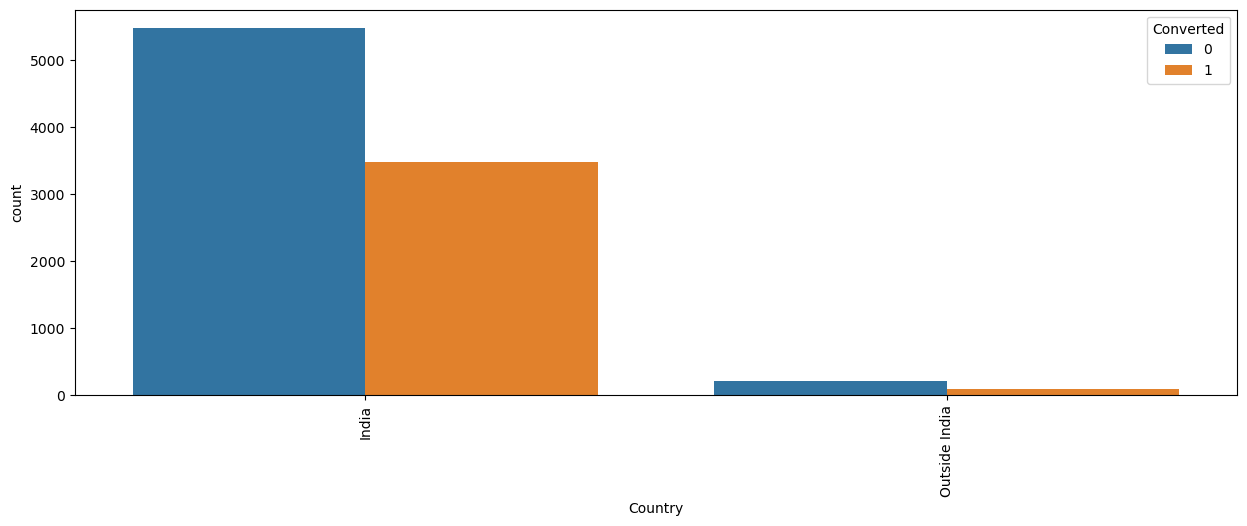

In [17]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
c1=sns.countplot(data.Country, hue=data.Converted)
c1.set_xticklabels(c1.get_xticklabels(),rotation=90)
plt.show()

In [18]:
# As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped
#creating a list of columns to be droppped
drop_cols=['Country']

In [19]:
#checking value counts of Specialization column
data['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# Replacing null values in the Specialization column with 'Not Specified' since the specialization might not be present in the list
data['Specialization'].fillna('Not Specified', inplace = True)

In [21]:
#combining Management Specializations because they show similar trends

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

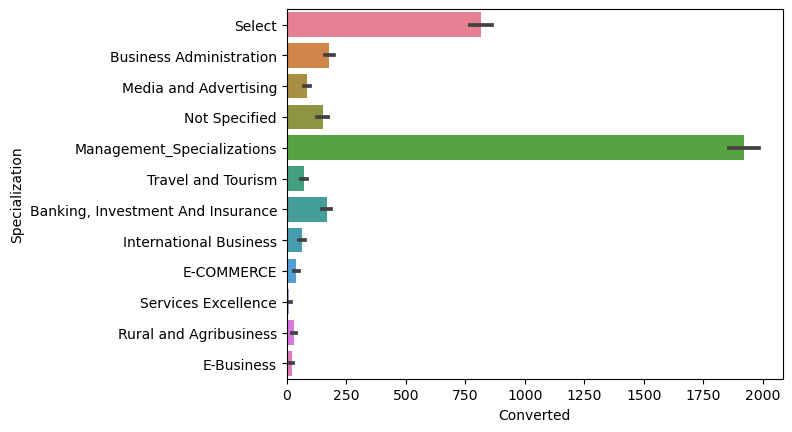

In [22]:
#plotting spread of Specialization columnn 
sns.barplot(y='Specialization', x='Converted', palette='husl', data=data, estimator=np.sum)

In [23]:
#checking value counts of 'What is your current occupation' column
data['What is your current occupation'].value_counts(dropna=False) 

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# Filling null values with mode i.e. 'Unemployed'
data['What is your current occupation'].fillna('Unemployed', inplace = True)

In [25]:
#checking value counts of 'What matters most to you in choosing a course' column
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
# We see many people opt for a course for better career prospects, we replace the null value with the same
data['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)

In [27]:
data['What matters most to you in choosing a course'].isna().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='What matters most to you in choosing a course'>

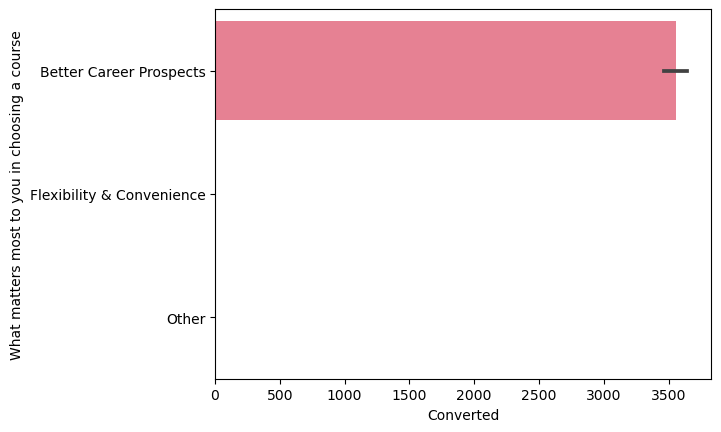

In [28]:
#plotting spread of 'What matters most to you in choosing a course' columnn 
sns.barplot(y='What matters most to you in choosing a course', x='Converted', palette='husl', data=data, estimator=np.sum)

In [29]:
# we have another Column that is worth Dropping. So we Append to drop_cols List
drop_cols.append('What matters most to you in choosing a course')
drop_cols

['Country', 'What matters most to you in choosing a course']

In [30]:
['Country', 'What matters most to you in choosing a course']

['Country', 'What matters most to you in choosing a course']

In [31]:
#checking value counts of Tags column
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [32]:
# Imputing Tags with mode
data['Tags'].fillna('Not Specified', inplace = True)

In [33]:
data['Tags'].isnull().sum()

0

In [34]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')

<AxesSubplot:xlabel='Converted', ylabel='Tags'>

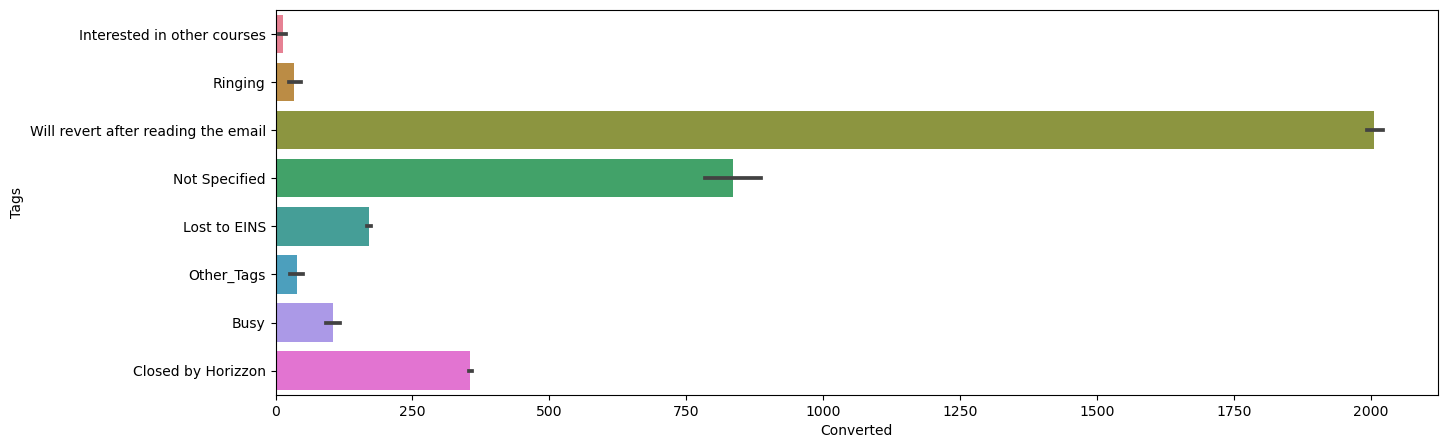

In [35]:
#plotting spread of 'Tags' columnn 
plt.figure(figsize=(15,5))
sns.barplot(y='Tags', x='Converted', palette='husl', data=data, estimator=np.sum)

In [36]:
#checking value counts of City column
data['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [37]:
# Replacing na values for city with Maharashtra
data['City'].fillna('Mumbai', inplace = True)

In [38]:
data['City'].isnull().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='City'>

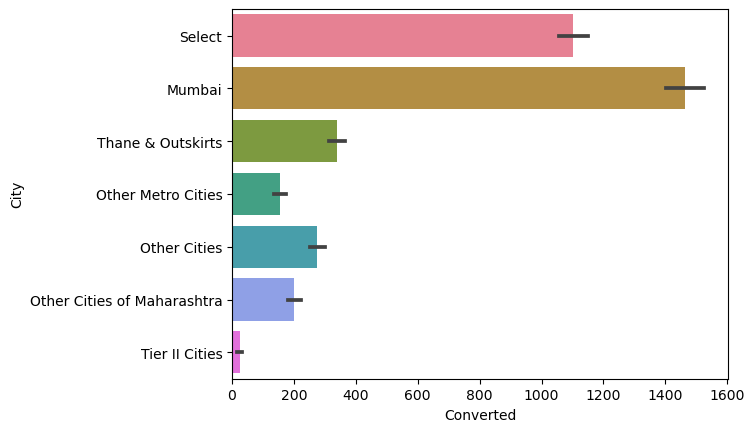

In [39]:
#plotting spread of 'City' columnn 
sns.barplot(y='City', x='Converted', palette='husl', data=data, estimator=np.sum)

In [40]:
# check null value
round(100*data.isna().sum()/len(data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [41]:
#checking value counts of Lead Source column
data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [42]:
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')

data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')

In [43]:
#checking value counts of Last Activity column
data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                        'View in browser link Clicked', 'Email Marked Spam','Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [45]:
data['Lead Source'].fillna('Others', inplace = True)
data['Last Activity'].fillna('Others', inplace = True)

In [46]:
# imputing with Median values because the continuous variables have outliers
data['TotalVisits'].replace(np.NaN, data['TotalVisits'].median(), inplace =True)
data['Page Views Per Visit'].replace(np.NaN, data['Page Views Per Visit'].median(), inplace =True)

In [47]:
# checking null values percentage Post Imputing data
round(100*data.isna().sum()/len(data),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [48]:
# checking value counts of Lead Origin column Lead Origin
data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

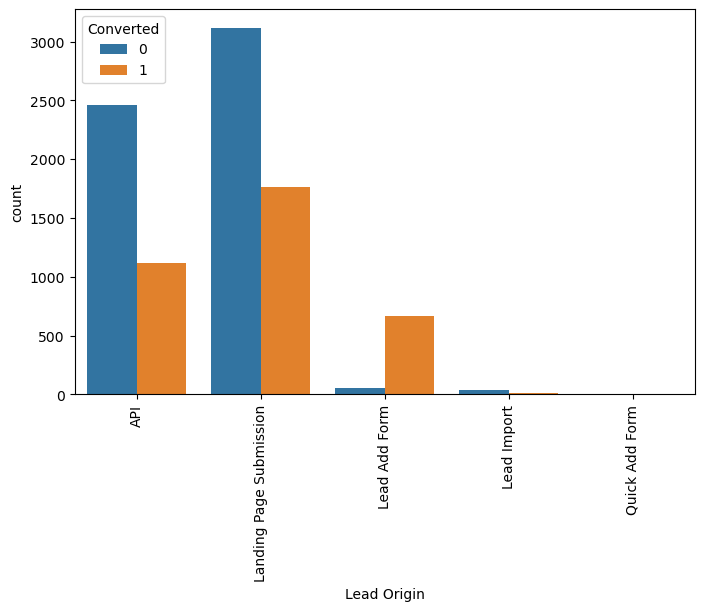

In [49]:
# visualizing count of Lead Origin based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(data['Lead Origin'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [50]:
#checking value counts of Lead Source column
data['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
google                 5
Live Chat              2
Name: Lead Source, dtype: int64

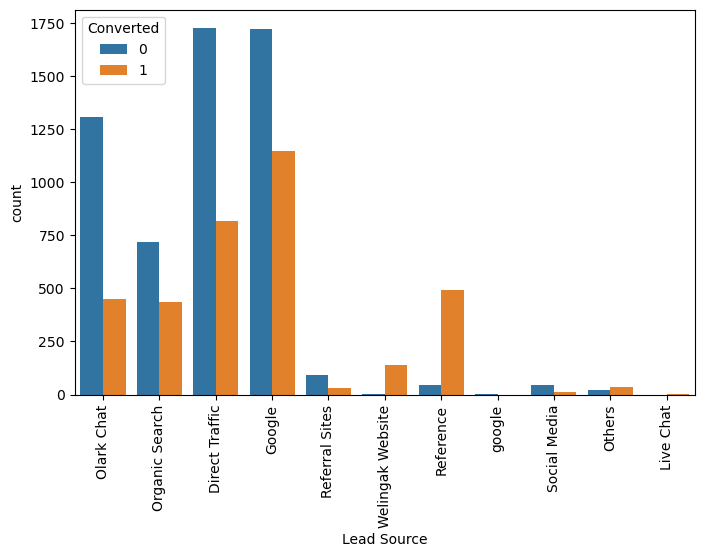

In [51]:
# visualizing count of Lead Source based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(data['Lead Source'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

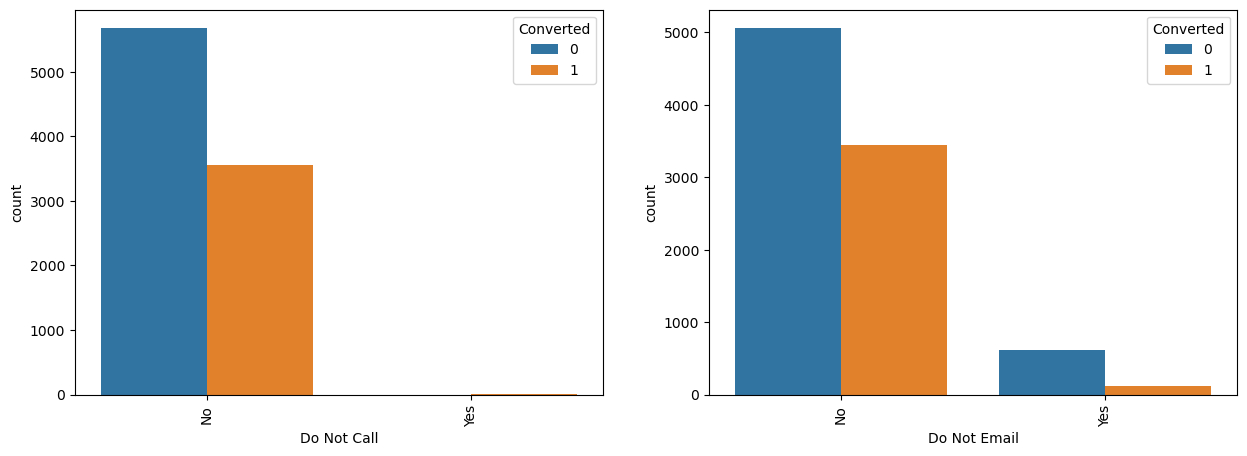

In [52]:
#visualizing count of Do Not Email & Do Not Call based on Converted value

plt.figure(figsize=(15,5))
p1=plt.subplot(1, 2, 1)
p1=sns.countplot(data['Do Not Call'], hue=data.Converted)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

p2=plt.subplot(1, 2, 2)
p2=sns.countplot(data['Do Not Email'], hue=data.Converted)
p2.set_xticklabels(p2.get_xticklabels(),rotation=90)
plt.show()

In [53]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [54]:
# We Can append the Do Not Call Column to the list of Columns to be Dropped since > 95% is of only one Value
drop_cols.append('Do Not Call')
drop_cols

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [55]:
# checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [56]:
# inbalabced variable that can be droped
# checking value counts of Search column
data.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [57]:
#checking value counts of Newspaper Article column
data['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
# checking value counts of X Education Forums column
data['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
#checking value counts of Magazine column
data['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [60]:
#checking value counts of Digital Advertisement column
data['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
#checking value counts of Through Recommendations column
data['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [62]:
#checking value counts of Newspaper column
data['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [63]:
#checking value counts of Receive More Updates About Our Courses column
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [64]:
#checking value counts of Update me on Supply Chain Content column
data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [65]:
#checking value counts of Get updates on DM Content column
data['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [66]:
#checking value counts of I agree to pay the amount through cheque column
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [67]:
#checking value counts of A free copy of Mastering The Interview column
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [68]:
#adding imbalanced columns to the list of columns to be dropped

drop_cols.extend(['Search','Newspaper Article','X Education Forums','Magazine','Digital Advertisement',
                  'Through Recommendations','Newspaper','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'])

In [69]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [70]:
#clubbing lower frequency values

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [71]:
#checking value counts for Last Notable Activity

data['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

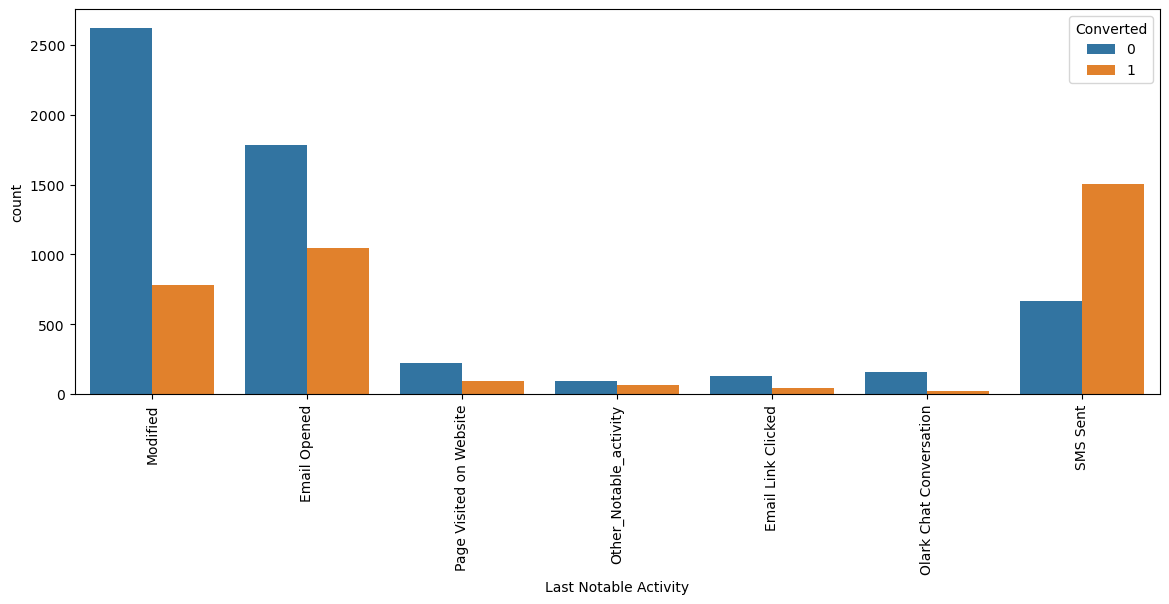

In [72]:
#visualizing count of Last Notable Activity based on Converted value
plt.figure(figsize = (14,5))
p1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [73]:
#list of columns to be dropped
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Magazine',
 'Digital Advertisement',
 'Through Recommendations',
 'Newspaper',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [74]:
#dropping columns
data = data.drop(drop_cols,1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

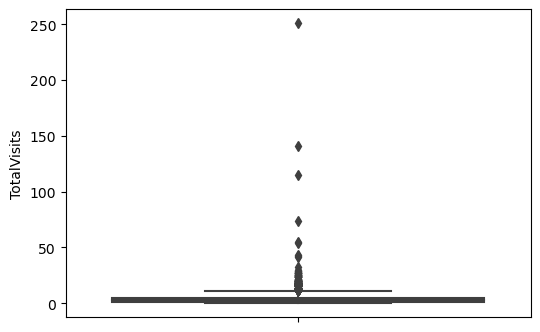

In [75]:
# Outlier Treatment
# check outlier for TotalVisits
plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [76]:
#checking percentile values for "Total Visits"

data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

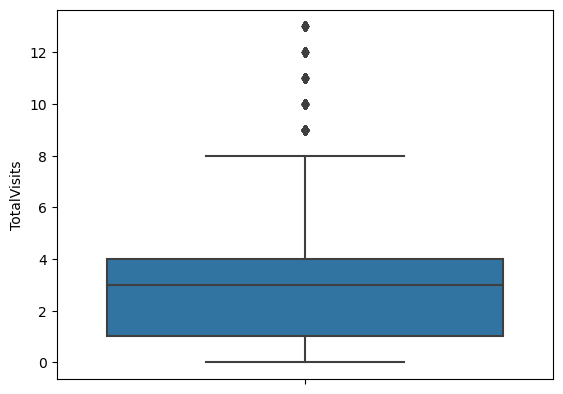

In [77]:
#Outlier Treatment: Remove top & bottom 2% of the Column Outlier values

Q3 = data.TotalVisits.quantile(0.98)
data = data[(data.TotalVisits <= Q3)]
Q1 = data.TotalVisits.quantile(0.02)
data = data[(data.TotalVisits >= Q1)]
sns.boxplot(y=data['TotalVisits'])
plt.show()

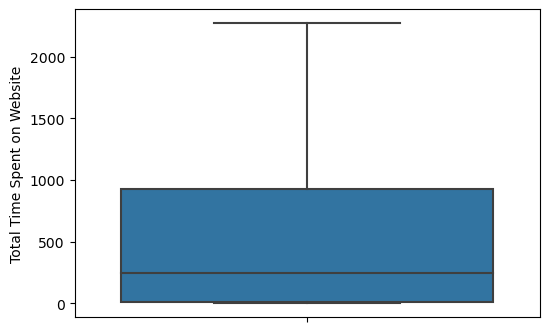

In [78]:
# check outlier for Total Time Spent on Website
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

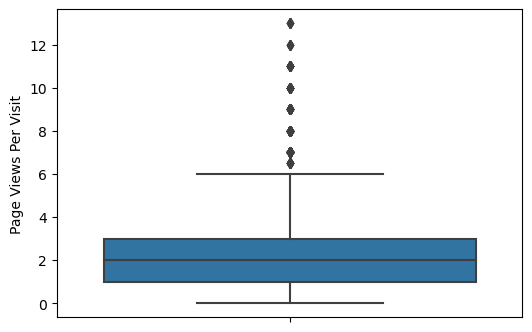

In [79]:
# Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column
#check outlier Page Views Per Visit
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

In [80]:
#checking spread of "Page Views Per Visit"

data['Page Views Per Visit'].describe()

count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

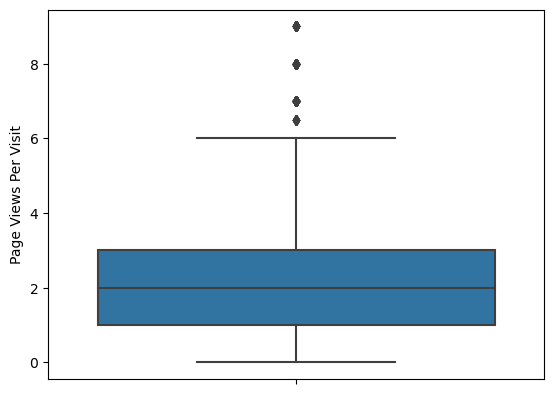

In [81]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = data['Page Views Per Visit'].quantile(0.99)
data = data[data['Page Views Per Visit'] <= Q3]
Q1 = data['Page Views Per Visit'].quantile(0.01)
data = data[data['Page Views Per Visit'] >= Q1]
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

In [82]:
# again check the shape of the dataset
data.shape

(9015, 18)

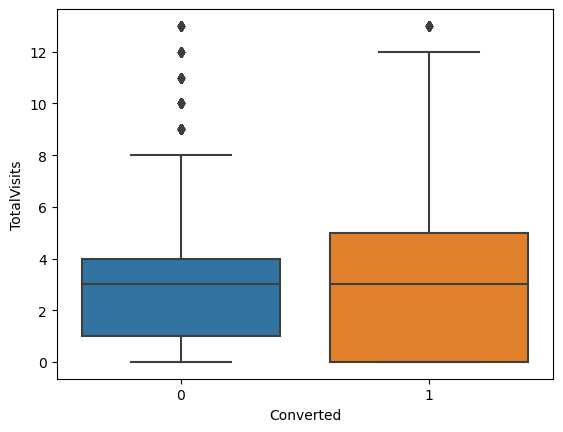

In [83]:
# Numerical Variable Analysis
# checking "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

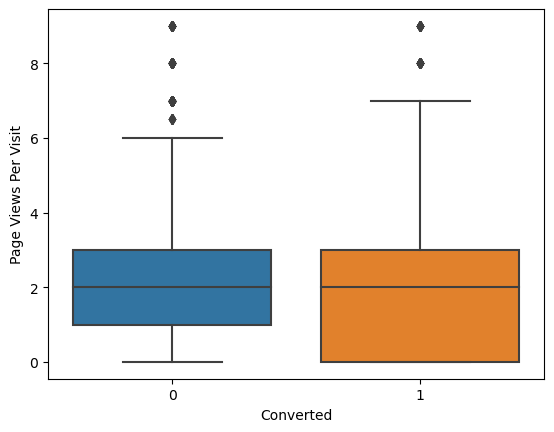

In [84]:
# Median for converted and not converted leads are the close
#checking "Page Views Per Visit" vs Converted variable
sns.boxplot(x=data.Converted,y=data['Page Views Per Visit'])
plt.show()

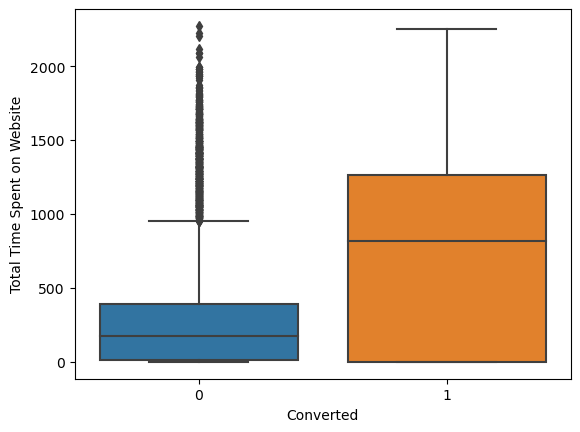

In [85]:
# Median for converted and unconverted leads is the same
#checking "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=data.Converted, y=data['Total Time Spent on Website'])
plt.show()

In [86]:
# Website should be made more engaging as Leads spending more time on the website are more likely to be converted, so to make leads spend more time
#Correlation Matrix
cor = data.corr()
cor

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.026670,0.052300,0.021346,0.060879
Converted,0.026670,1.000000,0.043805,0.358538,-0.007357
TotalVisits,0.052300,0.043805,1.000000,0.355323,0.756926
Total Time Spent on Website,0.021346,0.358538,0.355323,1.000000,0.346034
Page Views Per Visit,0.060879,-0.007357,0.756926,0.346034,1.000000


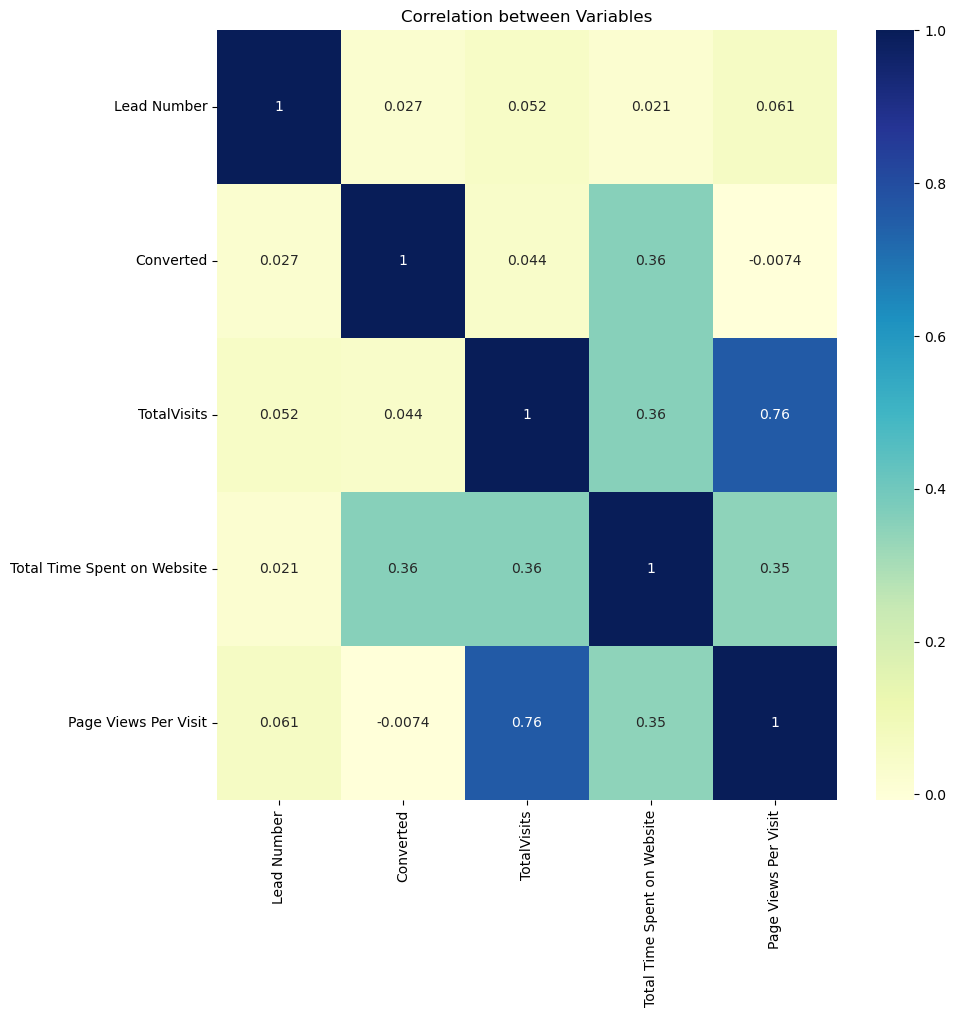

In [87]:
#Checking correlations of numeric values uing heatmap
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title("Correlation between Variables")
plt.show()


In [88]:
# Creation Dummy Variable
#list of categorical columns
cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [90]:
# So we have two columns 'A free copy of Mastering The Interview' & 'Do Not Email' to be changed to {0 ,1}
var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[var_list] = data[var_list].apply(binary_map)


In [91]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

data = pd.concat([data,dummy],1)

In [92]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [93]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [94]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [95]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

In [96]:
#dropping original columns
data.drop(cat_cols,1,inplace = True)
data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [97]:
# Spliting data to Train-Test
# import sklearn libary

from sklearn.model_selection import train_test_split

y = data['Converted']
X=data.drop('Converted', axis=1)

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
# Scaling of Data
# again import sklearn libary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6804,-0.840425,-0.016875,-0.785601,-0.404001,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6592,-0.772027,-0.016875,0.106052,-0.404001,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4921,-0.189412,-0.390500,-0.572778,-0.135630,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9224,-1.606683,0.356749,-0.049896,0.937854,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5678,-0.459315,-0.016875,-0.229694,0.401112,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
# Feature Selection Using RFE
# again import LogisticRegression from sklearn libary
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=18)    
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 24),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 23),
 ('Lead Origin_Quick Add Form', False, 33),
 ('What is your current occupation_Housewife', False, 17),
 ('What is your current occupation_Other', False, 30),
 ('What is your current occupation_Student', False, 9),
 ('What is your current occupation_Unemployed', False, 4),
 ('What is your current occupation_Working Professional', False, 20),
 ('City_Other Cities', False, 16),
 ('City_Other Cities of Maharashtra', False, 29),
 ('City_Other Metro Cities', False, 28),
 ('City_Select', True, 1),
 ('City_Thane & Outskirts', False, 22),
 ('City_Tier II Cities', False, 5),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_Olark Chat', False, 15

In [104]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'City_Select', 'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [105]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_google', 'Tags_Busy',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Notable Ac

In [106]:
# import libary
import statsmodels.api as sm

In [107]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.2
Date:                Tue, 21 Mar 2023   Deviance:                       2406.5
Time:                        07:34:13   Pearson chi2:                 1.09e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6126
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6018      0.093    -17.215      0.000      -1.784      -1.419
Total Time Spent on Website                  0.9286      0.056     16.669      0.000       0.819       1.038
Lead Origin_Lead Add Form                    1.7546      0.780      2.249      0.025       0.226       3.284
City_Select                                  1.7996      0.143     12.614      0.000       1.520       2.079
Lead Source_Organic Search                  -0.2707      0.172     -1.572      0.116      -0.608       0.067
Lead Source_Reference                       -1.3877      0.850     -1.633      0.102      -3.053       0.277
Lead Source_Referral Sites                  -0.4929      0.476     -1.036      0.300      -1.426       0.440
Lead Source_Welingak Website                 2.1240      1.063      1.998      0.046       0.040       4.208
Tags_Closed by Horizzon                      6.6114      0.746      8.868      0.000       5.150       8.073
Tags_Interested in other courses            -2.8490      0.424     -6.713      0.000      -3.681      -2.017
Tags_Lost to EINS                            5.3758      0.547      9.822      0.000       4.303       6.449
Tags_Other_Tags                             -2.9826      0.224    -13.328      0.000      -3.421      -2.544
Tags_Ringing                                -4.0338      0.267    -15.130      0.000      -4.556      -3.511
Tags_Will revert after reading the email     4.3442      0.186     23.366      0.000       3.980       4.709
Last Activity_Email Bounced                 -1.5571      0.432     -3.605      0.000      -2.404      -0.710
Last Activity_Olark Chat Conversation       -0.6981      0.249     -2.802      0.005      -1.186      -0.210
Last Activity_SMS Sent                       0.9058      0.238      3.812      0.000       0.440       1.372
Last Notable Activity_Modified              -1.0569      0.161     -6.545      0.000      -1.373      -0.740
Last Notable Activity_SMS Sent               1.1930      0.269      4.432      0.000       0.665       1.721
============================================================================================================
"""

In [108]:
col = col.drop('Lead Source_Welingak Website',1)

In [109]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.3
Date:                Tue, 21 Mar 2023   Deviance:                       2410.7
Time:                        07:34:37   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6124
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5947      0.093    -17.184      0.000      -1.777      -1.413
Total Time Spent on Website                  0.9285      0.056     16.652      0.000       0.819       1.038
Lead Origin_Lead Add Form                    3.1119      0.483      6.440      0.000       2.165       4.059
City_Select                                  1.7960      0.143     12.596      0.000       1.517       2.076
Lead Source_Organic Search                  -0.2687      0.172     -1.560      0.119      -0.606       0.069
Lead Source_Reference                       -2.7423      0.590     -4.645      0.000      -3.899      -1.585
Lead Source_Referral Sites                  -0.4951      0.476     -1.040      0.298      -1.428       0.438
Tags_Closed by Horizzon                      6.6212      0.746      8.881      0.000       5.160       8.082
Tags_Interested in other courses            -2.8459      0.424     -6.704      0.000      -3.678      -2.014
Tags_Lost to EINS                            5.3905      0.549      9.818      0.000       4.314       6.467
Tags_Other_Tags                             -2.9828      0.224    -13.330      0.000      -3.421      -2.544
Tags_Ringing                                -4.0539      0.268    -15.120      0.000      -4.579      -3.528
Tags_Will revert after reading the email     4.3454      0.186     23.338      0.000       3.980       4.710
Last Activity_Email Bounced                 -1.6695      0.434     -3.849      0.000      -2.520      -0.819
Last Activity_Olark Chat Conversation       -0.6959      0.249     -2.794      0.005      -1.184      -0.208
Last Activity_SMS Sent                       0.9159      0.237      3.860      0.000       0.451       1.381
Last Notable Activity_Modified              -1.0710      0.161     -6.638      0.000      -1.387      -0.755
Last Notable Activity_SMS Sent               1.1770      0.269      4.380      0.000       0.650       1.704
============================================================================================================
"""

In [110]:
# Checking VIFs
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Last Notable Activity_SMS Sent,6.47
14,Last Activity_SMS Sent,6.35
1,Lead Origin_Lead Add Form,4.38
4,Lead Source_Reference,4.04
15,Last Notable Activity_Modified,2.24
11,Tags_Will revert after reading the email,1.61
2,City_Select,1.59
13,Last Activity_Olark Chat Conversation,1.41
6,Tags_Closed by Horizzon,1.33
0,Total Time Spent on Website,1.24


In [112]:
# VIF for all the variables looks good. So we don't need to drop any of these variables

# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6804    0.089147
6592    0.818995
4921    0.106548
9224    0.003842
5678    0.041187
7919    0.661216
4719    0.507537
5806    0.993206
874     0.978841
7954    0.020827
dtype: float64

In [113]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08914665, 0.81899474, 0.10654848, 0.0038421 , 0.04118683,
       0.66121644, 0.50753744, 0.9932061 , 0.97884093, 0.02082684])

In [114]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.089147,6804
1,0,0.818995,6592
2,0,0.106548,4921
3,0,0.003842,9224
4,0,0.041187,5678


In [115]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the datset
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.089147,6804,0
1,0,0.818995,6592,1
2,0,0.106548,4921,0
3,0,0.003842,9224,0
4,0,0.041187,5678,0


In [116]:
# import matrix libary
from sklearn import metrics

In [117]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3753  149]
 [ 303 2105]]


In [118]:
# Predicted       not_converted    Converted
# Actual
# not_converted        3741          161
# Converted            292          2116 
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9283676703645007


In [119]:
# Metrics beyond simply accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8741694352159468

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.9618144541260892

In [122]:
# Calculate false postive rate - predicting Converted when lead does not have converted
print(FP/ float(TN+FP))

0.03818554587391081


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.9338952972493345


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9252958579881657


In [125]:
# Plotting the ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

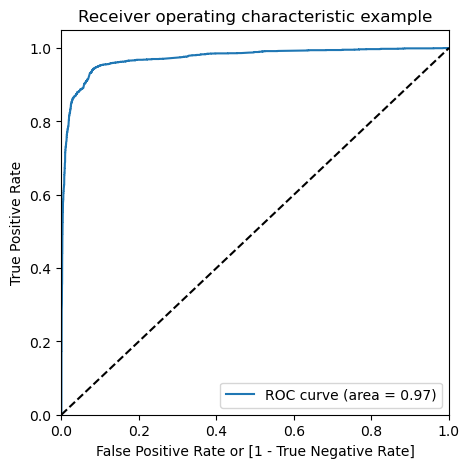

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [128]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.089147,6804,0,1,0,0,0,0,0,0,0,0,0
1,0,0.818995,6592,1,1,1,1,1,1,1,1,1,1,0
2,0,0.106548,4921,0,1,1,0,0,0,0,0,0,0,0
3,0,0.003842,9224,0,1,0,0,0,0,0,0,0,0,0
4,0,0.041187,5678,0,1,0,0,0,0,0,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381616  1.000000  0.000000
0.1   0.1  0.858954  0.968023  0.791645
0.2   0.2  0.918542  0.953488  0.896976
0.3   0.3  0.927417  0.942691  0.917991
0.4   0.4  0.925674  0.904485  0.938749
0.5   0.5  0.928368  0.874169  0.961814
0.6   0.6  0.928051  0.856312  0.972322
0.7   0.7  0.923930  0.839701  0.975910
0.8   0.8  0.916006  0.811462  0.980523
0.9   0.9  0.885895  0.717608  0.989749


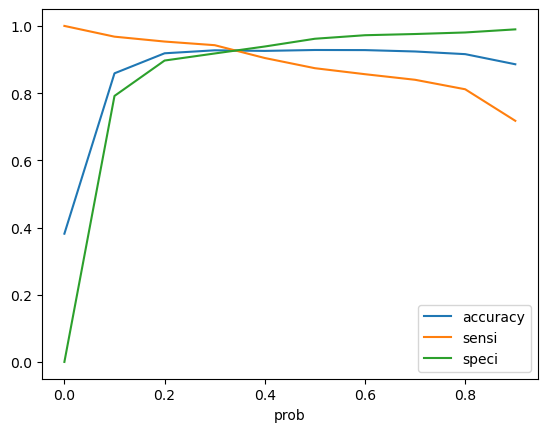

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [131]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.089147,6804,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.818995,6592,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.106548,4921,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.003842,9224,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.041187,5678,0,1,0,0,0,0,0,0,0,0,0,0


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9274167987321712

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3582,  320],
       [ 138, 2270]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9426910299003323

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9179907739620707

In [137]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08200922603792926


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8764478764478765


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9629032258064516


In [140]:
# Precision and Recall
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3582,  320],
       [ 138, 2270]], dtype=int64)

In [141]:
# Precision
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8764478764478765

In [142]:
# Recall
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9426910299003323

In [143]:
# again import libary
from sklearn.metrics import precision_score, recall_score

In [144]:
?precision_score

In [145]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8764478764478765

In [146]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9426910299003323

In [147]:
# Precision and recall tradeoff
# import libary
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6305    0
 6306    1
 6307    0
 6308    0
 6309    0
 Name: Converted, Length: 6310, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6305    0
 6306    1
 6307    0
 6308    0
 6309    0
 Name: final_predicted, Length: 6310, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

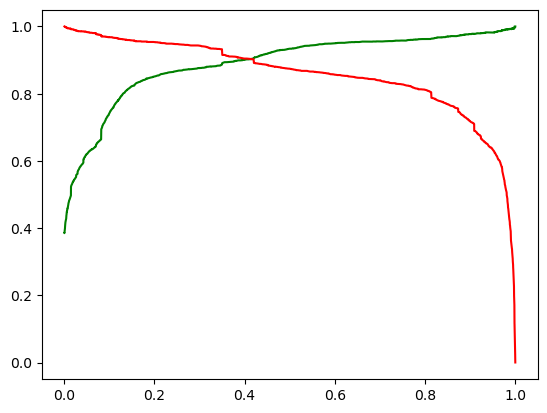

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [151]:
# Making predictions on the test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2781,0.663497,-1.142465,-0.873896,-1.178596,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8231,-1.274242,0.744667,-0.817464,1.446765,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1721,1.072981,0.744667,1.782067,1.446765,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5226,-0.318470,-0.387612,-0.791978,-0.128452,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4912,-0.185933,-0.010186,-0.236756,0.396621,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [152]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,City_Select,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2781,-0.873896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8231,-0.817464,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
1721,1.782067,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5226,-0.791978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4912,-0.236756,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [153]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

2781    0.029972
8231    0.010117
1721    0.987936
5226    0.032265
4912    0.001614
8301    0.043026
8257    0.985893
707     0.001747
4383    0.003812
1803    0.997911
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Let's see the head
y_pred_1.head()

,0
2781,0.029972
8231,0.010117
1721,0.987936
5226,0.032265
4912,0.001614


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2781,0.029972
1,0,8231,0.010117
2,1,1721,0.987936
3,0,5226,0.032265
4,0,4912,0.001614


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [163]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [164]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2781,0,0.029972,3,0
1,8231,0,0.010117,1,0
2,1721,1,0.987936,99,1
3,5226,0,0.032265,3,0
4,4912,0,0.001614,0,0


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9316081330868762

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1532,  119],
       [  66,  988]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.937381404174573

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.9279224712295578

In [170]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8925022583559169

In [171]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.937381404174573

In [172]:
#Final Observation:

#Train Data:
#Accuracy : 92.14%
#Sensitivity : 91.49%
#Specificity : 92.54%

#Test Data:
#Accuracy : 92.57%
#Sensitivity : 91.18%
#Specificity : 93.46%

#The model seems to be performing well. Can be recommend this model in making good calls based on this model